In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


In [16]:
sleep_data = pd.read_csv('Sleep.csv')
sleep = pd.DataFrame(sleep_data)

In [30]:
sleepTransformed = sleep.copy()
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
original_reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(original_reg.rsquared_adj)

0.7833097936534077


## Stress Square Rooted

In [17]:
sleepTransformed = sleep.copy()
sleepTransformed['Stress'] = sleepTransformed['Stress']**(1/2)
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(reg.rsquared_adj)

0.7823822328813059


## Stress Squared

In [18]:
sleepTransformed = sleep.copy()
sleepTransformed['Stress'] = sleepTransformed['Stress']**2
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(reg.rsquared_adj)

0.7862298023651022


## Quality Natural Log

In [19]:
sleepTransformed = sleep.copy()
sleepTransformed['Quality'] = np.log(sleepTransformed['Quality'])
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(reg.rsquared_adj)

0.7610359499733854


## Quality Squared

In [20]:
sleepTransformed = sleep.copy()
sleepTransformed['Quality'] = sleepTransformed['Quality']**2
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(reg.rsquared_adj)

0.7954994773135682


## Physical Activity Square Rooted

In [21]:
sleepTransformed = sleep.copy()
sleepTransformed['Physical_Activity'] = np.sqrt(sleepTransformed['Physical_Activity'])
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(reg.rsquared_adj)

0.7823751205655471


## Physical Activity Squared

In [22]:
sleepTransformed = sleep.copy()
sleepTransformed['Physical_Activity'] = (sleepTransformed['Physical_Activity'])**2
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(reg.rsquared_adj)

0.784848339315472


## Duration Natural Log

In [23]:
sleepTransformed = sleep.copy()
sleepTransformed['Duration'] = np.log(sleepTransformed['Duration'])
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(reg.rsquared_adj)

0.7892440286694513


## Duration Sqrt

In [24]:
sleepTransformed = sleep.copy()
sleepTransformed['Duration'] = np.sqrt(sleepTransformed['Duration'])
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(reg.rsquared_adj)

0.7866169431102564


## Stress^2, Quality^2, Physical Activity^2, Duration natural log

In [31]:
sleepTransformed = sleep.copy()
sleepTransformed['Physical_Activity'] = (sleepTransformed['Physical_Activity'])**2
sleepTransformed['Quality'] = (sleepTransformed['Quality'])**2
sleepTransformed['Stress'] = (sleepTransformed['Stress'])**2
sleepTransformed['Duration'] = np.log(sleepTransformed['Duration'])
X = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y = sleepTransformed['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
# print(reg.summary())
print(reg.rsquared_adj)

0.8047269776324298


## PLOTS OF THE MOST RECENTLY RUN THING

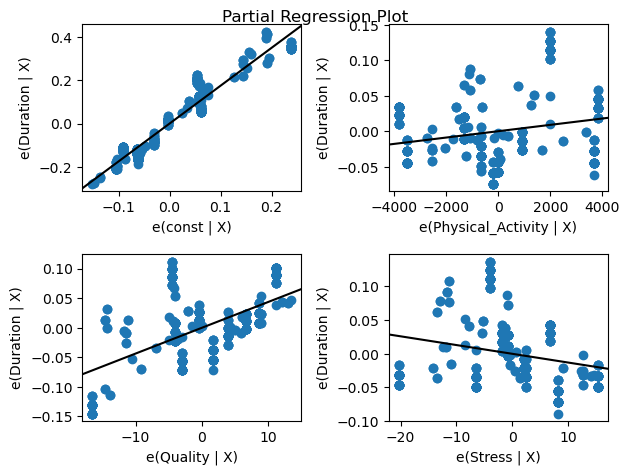

In [29]:
sm.graphics.plot_partregress_grid(reg)
plt.show()

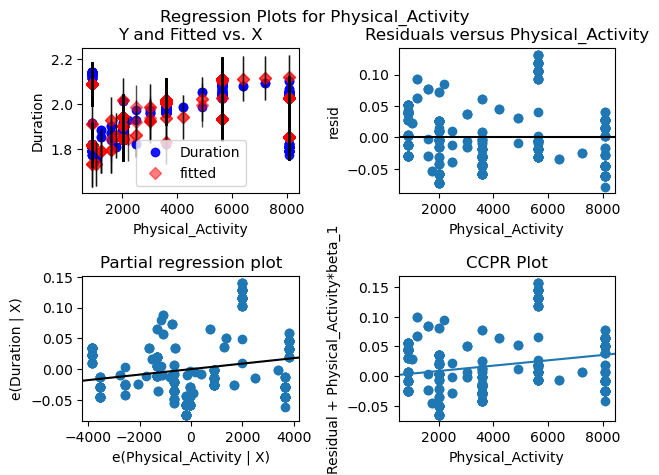

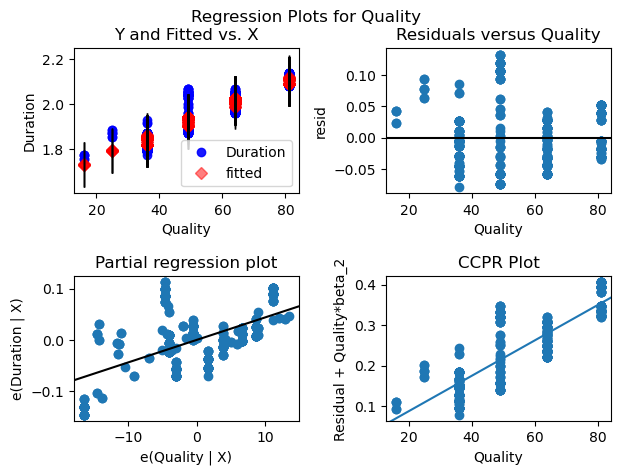

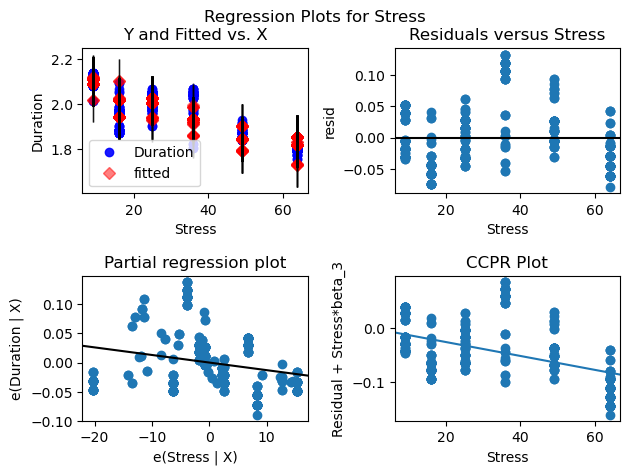

In [26]:
sm.graphics.plot_regress_exog(reg,'Physical_Activity')
plt.show()

sm.graphics.plot_regress_exog(reg,'Quality')
plt.show()

sm.graphics.plot_regress_exog(reg,'Stress')
plt.show()

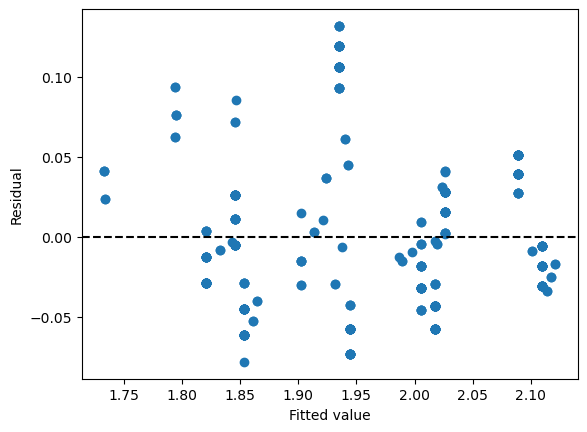

In [27]:
fitted_y = reg.fittedvalues

residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

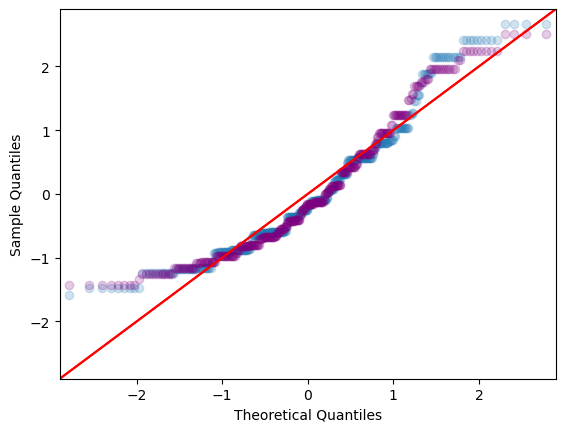

In [57]:
original_residuals = original_reg.resid

fig, ax = plt.subplots()

sm.qqplot(residuals, fit = True, line='45', alpha = 0.2, ax=ax)
sm.qqplot(original_residuals, fit = True, line='45', markerfacecolor='purple', markeredgecolor='purple', alpha = 0.2, ax=ax)

plt.show()